# Thematic Analysis - Ethiopian Banking Apps  
## Task 2: Identifying Key Themes and Pain Points

### 📋 Business Objective
Identify recurring themes and topics in user reviews to uncover satisfaction drivers and pain points across three Ethiopian banking apps.

**Analytical Approach:**
- TF-IDF keyword extraction to find significant terms
- Rule-based clustering into banking-specific themes
- Theme frequency analysis by bank
- Sentiment-theme correlation analysis

### 🎯 Key Questions
1. What are the most common complaint themes for each bank?
2. Which themes have the most negative sentiment?
3. What feature requests do users commonly make?
4. How do themes differ across banks?

### 🏗️ Theme Categories
- Login & Access Issues
- Transaction Problems  
- App Performance & Speed
- User Interface & Experience
- Customer Support
- Security Concerns
- Feature Requests
- Network & Connectivity

In [1]:
# Cell 1: Setup and Imports for Thematic Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter, defaultdict
import re

# Add project root to path
sys.path.append('..')

# Import configuration and custom modules
from config import DATA_PATHS
from scripts.theme_analyzer import ThemeAnalyzer

# Setup visualization
plt.style.use('default')
sns.set_palette("Set2")
sns.set_style("whitegrid")
%matplotlib inline

print(" Thematic analysis libraries imported successfully!")

 Thematic analysis libraries imported successfully!


In [2]:
# Cell 2: Load Sentiment Analysis Results
print("📥 Loading Sentiment Analysis Results...")

try:
    # Load data with sentiment scores from previous analysis
    sentiment_path = DATA_PATHS['sentiment_results']
    
    if os.path.exists(sentiment_path):
        df_sentiment = pd.read_csv(sentiment_path)
        print(f" Loaded {len(df_sentiment):,} reviews with sentiment analysis")
    else:
        print(" Sentiment results not found. Running sentiment analysis first...")
        # Fallback - you would run sentiment analysis here
        raise FileNotFoundError("Please run sentiment analysis first")
    
    # Display overview
    print(f"\n📊 Dataset Overview:")
    print(f"   Total Reviews: {len(df_sentiment):,}")
    print(f"   Banks: {', '.join(df_sentiment['bank'].unique())}")
    print(f"   Sentiment Distribution: {df_sentiment['sentiment_label'].value_counts().to_dict()}")
    
    # Show sample
    print("\n Sample Data with Sentiment:")
    display(df_sentiment[['review_id', 'bank', 'rating', 'sentiment_label', 'review']].head(3))
    
except Exception as e:
    print(f" Error loading data: {e}")
    raise

📥 Loading Sentiment Analysis Results...
 Loaded 1,244 reviews with sentiment analysis

📊 Dataset Overview:
   Total Reviews: 1,244
   Banks: Commercial Bank of Ethiopia, Bank of Abyssinia, Dashen Bank
   Sentiment Distribution: {'POSITIVE': 753, 'NEGATIVE': 482, 'NEUTRAL': 9}

 Sample Data with Sentiment:


,review_id,bank,rating,sentiment_label,review
0,REVIEW_0001,Commercial Bank of Ethiopia,5,POSITIVE,good app
1,REVIEW_0002,Commercial Bank of Ethiopia,5,POSITIVE,This application is very important and advanta...
2,REVIEW_0003,Commercial Bank of Ethiopia,1,NEGATIVE,why didn't work this app?


In [3]:
# Cell 3: Initialize Theme Analyzer
print("🔍 Initializing Theme Analysis Engine...")

try:
    theme_analyzer = ThemeAnalyzer()
    print(" Theme analyzer initialized successfully!")
    print(f"   Theme categories: {len(theme_analyzer.theme_patterns)}")
    print("   Methods: TF-IDF + Rule-based clustering")
    
    # Display theme categories
    print(f"\n🎯 Theme Categories Defined:")
    for i, theme in enumerate(theme_analyzer.theme_patterns.keys(), 1):
        keywords_sample = theme_analyzer.theme_patterns[theme][:5]
        print(f"   {i}. {theme}: {', '.join(keywords_sample)}...")
        
except Exception as e:
    print(f" Error initializing theme analyzer: {e}")
    raise

🔍 Initializing Theme Analysis Engine...
🔍 Setting up thematic analysis...
 Theme analyzer initialized successfully!
   Theme categories: 8
   Methods: TF-IDF + Rule-based clustering

🎯 Theme Categories Defined:
   1. Login & Access Issues: login, password, access, account, verify...
   2. Transaction Problems: transfer, transaction, payment, send money, receive money...
   3. App Performance & Speed: slow, fast, speed, loading, lag...
   4. User Interface & Experience: interface, design, layout, navigation, button...
   5. Customer Support: support, help, service, response, contact...
   6. Security Concerns: security, safe, secure, hack, privacy...
   7. Feature Requests: should, would, could, add, feature...
   8. Network & Connectivity: network, connection, internet, connect, offline...


In [4]:
# Cell 4: Perform Thematic Analysis
print("🎯 Identifying Themes in Reviews...")

# Perform thematic analysis
df_themes, bank_themes = theme_analyzer.analyze_themes_by_bank(df_sentiment)

print(" Thematic Analysis Completed!")
print(f"📊 Theme Identification Results:")
print(f"   Reviews with themes identified: {theme_analyzer.stats['reviews_with_themes']:,}")
print(f"   Total themes identified: {theme_analyzer.stats['themes_identified']:,}")
print(f"   Coverage rate: {(theme_analyzer.stats['reviews_with_themes'] / theme_analyzer.stats['total_reviews']) * 100:.1f}%")

# Display sample with themes
print("\n🔍 Sample Reviews with Identified Themes:")
sample_display = df_themes[['review_id', 'bank', 'rating', 'sentiment_label', 'review', 'identified_themes']].head(5)
display(sample_display)

# Show theme distribution
all_themes = []
for themes in df_themes['identified_themes']:
    if themes:
        all_themes.extend(themes)

theme_freq = pd.Series(all_themes).value_counts()
print(f"\n📈 Overall Theme Frequency:")
for theme, count in theme_freq.items():
    percentage = (count / len(all_themes)) * 100
    print(f"   {theme}: {count} mentions ({percentage:.1f}%)")

🎯 Identifying Themes in Reviews...
🎯 Starting thematic analysis...
   Processing reviews for theme identification...
 Thematic Analysis Completed!
📊 Theme Identification Results:
   Reviews with themes identified: 351
   Total themes identified: 576
   Coverage rate: 28.2%

🔍 Sample Reviews with Identified Themes:


,review_id,bank,rating,sentiment_label,review,identified_themes
0,REVIEW_0001,Commercial Bank of Ethiopia,5,POSITIVE,good app,[]
1,REVIEW_0002,Commercial Bank of Ethiopia,5,POSITIVE,This application is very important and advanta...,[Transaction Problems]
2,REVIEW_0003,Commercial Bank of Ethiopia,1,NEGATIVE,why didn't work this app?,[]
3,REVIEW_0004,Commercial Bank of Ethiopia,5,POSITIVE,The app makes our life easier. Thank you CBE!,[]
4,REVIEW_0005,Commercial Bank of Ethiopia,1,NEGATIVE,this app very bad 👎,[]



📈 Overall Theme Frequency:
   Feature Requests: 131 mentions (22.7%)
   App Performance & Speed: 111 mentions (19.3%)
   Login & Access Issues: 80 mentions (13.9%)
   Transaction Problems: 78 mentions (13.5%)
   Customer Support: 59 mentions (10.2%)
   User Interface & Experience: 55 mentions (9.5%)
   Security Concerns: 37 mentions (6.4%)
   Network & Connectivity: 25 mentions (4.3%)


📊 Creating Theme Analysis Dashboard...


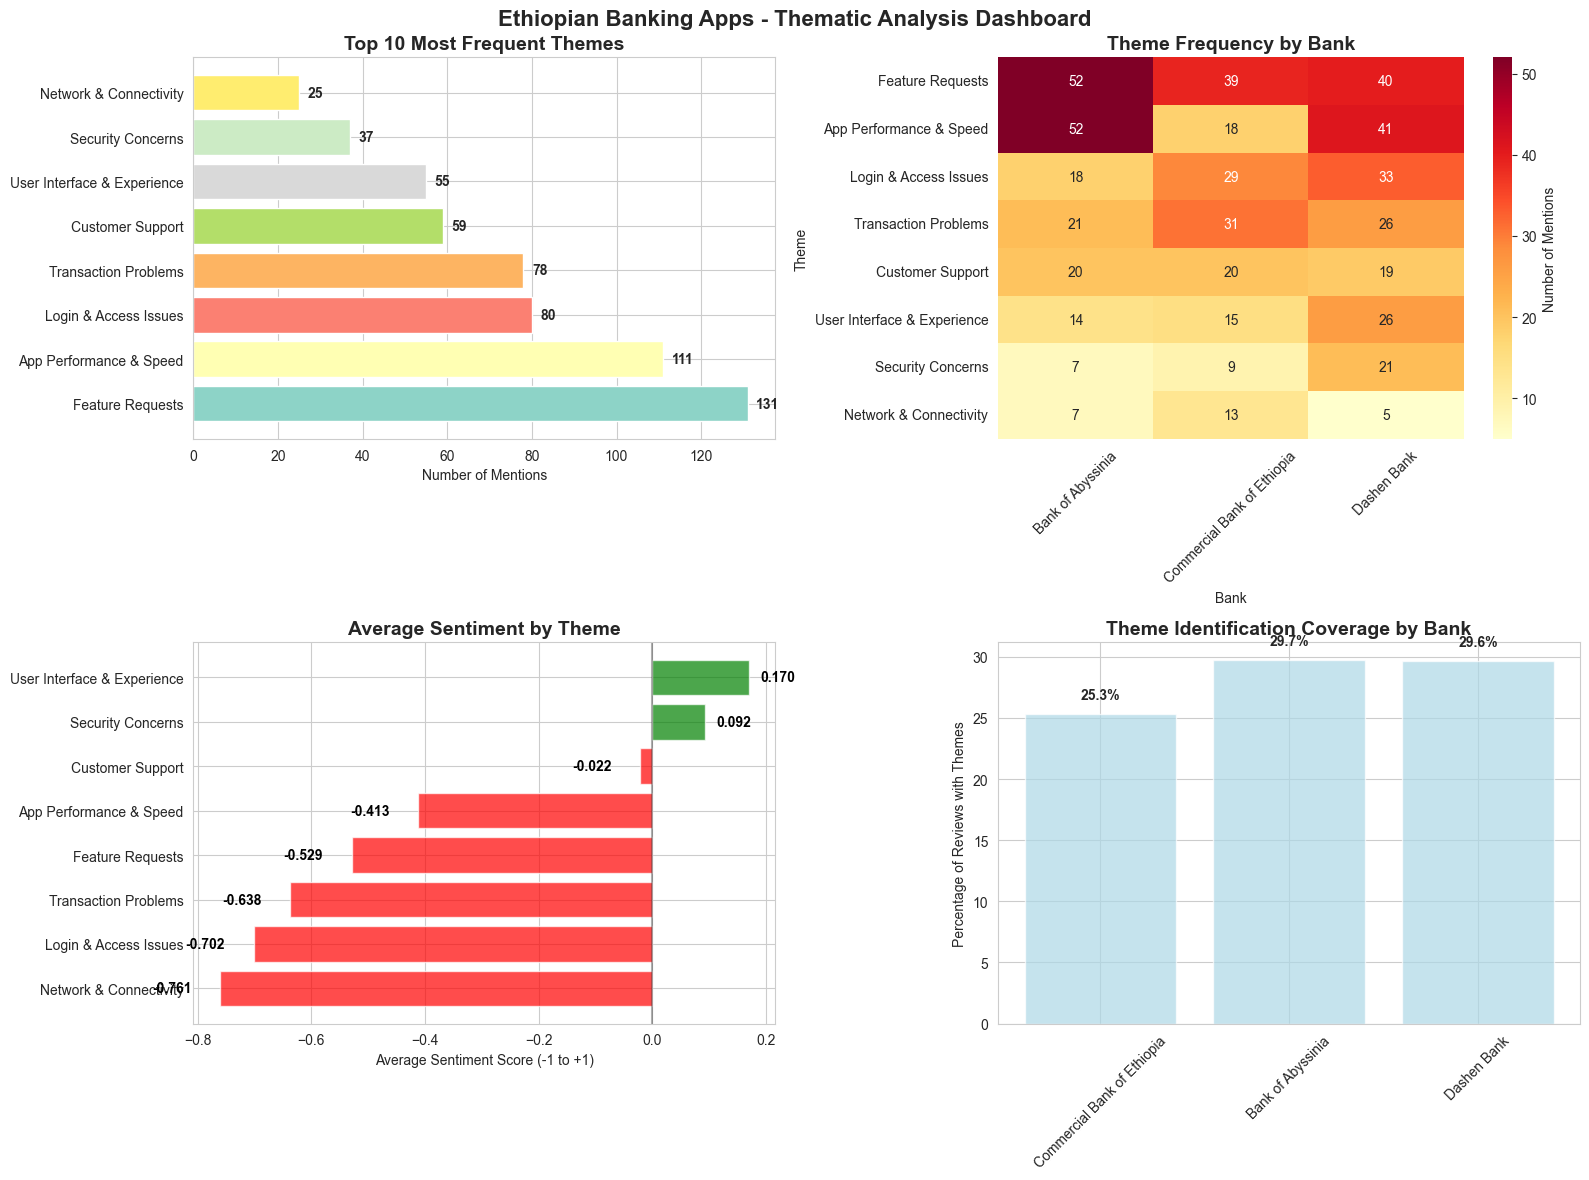

 Theme visualization dashboard created!


In [5]:
# Cell 5: Comprehensive Theme Visualization Dashboard
print("📊 Creating Theme Analysis Dashboard...")

# Create visualization grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Ethiopian Banking Apps - Thematic Analysis Dashboard', fontsize=16, fontweight='bold')

# Plot 1: Overall Theme Frequency (Horizontal Bar Chart)
theme_freq_top10 = theme_freq.head(10)
colors_theme = plt.cm.Set3(np.linspace(0, 1, len(theme_freq_top10)))

bars = axes[0,0].barh(theme_freq_top10.index, theme_freq_top10.values, color=colors_theme)
axes[0,0].set_title('Top 10 Most Frequent Themes', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Number of Mentions')

# Add value labels on bars
for bar, value in zip(bars, theme_freq_top10.values):
    axes[0,0].text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2, 
                  f'{value}', ha='left', va='center', fontweight='bold')

# Plot 2: Theme Distribution by Bank (Heatmap)
theme_bank_data = []
for bank, themes_counter in bank_themes.items():
    for theme, count in themes_counter.items():
        theme_bank_data.append({'Bank': bank, 'Theme': theme, 'Count': count})
        
theme_bank_df = pd.DataFrame(theme_bank_data)
heatmap_data = theme_bank_df.pivot(index='Theme', columns='Bank', values='Count').fillna(0)

# Sort by total frequency
heatmap_data['Total'] = heatmap_data.sum(axis=1)
heatmap_data = heatmap_data.sort_values('Total', ascending=False).drop('Total', axis=1)

sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[0,1], 
            cbar_kws={'label': 'Number of Mentions'})
axes[0,1].set_title('Theme Frequency by Bank', fontsize=14, fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].tick_params(axis='y', rotation=0)

# Plot 3: Sentiment by Theme (Bar Chart)
theme_sentiment_data = []
for theme in theme_freq.index:
    theme_reviews = df_themes[df_themes['identified_themes'].apply(
        lambda x: theme in x if x else False
    )]
    if len(theme_reviews) > 0:
        avg_sentiment = theme_reviews['sentiment_numeric'].mean()
        review_count = len(theme_reviews)
        theme_sentiment_data.append({
            'Theme': theme, 
            'Avg_Sentiment': avg_sentiment, 
            'Review_Count': review_count
        })

theme_sentiment_df = pd.DataFrame(theme_sentiment_data)
theme_sentiment_df = theme_sentiment_df.sort_values('Avg_Sentiment')

# Color bars by sentiment
colors_sent = ['red' if x < 0 else 'green' for x in theme_sentiment_df['Avg_Sentiment']]
bars = axes[1,0].barh(theme_sentiment_df['Theme'], theme_sentiment_df['Avg_Sentiment'], color=colors_sent, alpha=0.7)
axes[1,0].axvline(x=0, color='black', linestyle='-', alpha=0.3)
axes[1,0].set_title('Average Sentiment by Theme', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Average Sentiment Score (-1 to +1)')

# Add sentiment values on bars
for bar, value in zip(bars, theme_sentiment_df['Avg_Sentiment']):
    axes[1,0].text(bar.get_width() + (0.02 if value >= 0 else -0.05), 
                  bar.get_y() + bar.get_height()/2,
                  f'{value:.3f}', 
                  ha='left' if value >= 0 else 'right', 
                  va='center', 
                  fontweight='bold',
                  color='black')

# Plot 4: Theme Coverage by Bank (Bar Chart)
coverage_data = []
for bank in df_themes['bank'].unique():
    bank_data = df_themes[df_themes['bank'] == bank]
    coverage = (bank_data['identified_themes'].str.len() > 0).mean() * 100
    total_reviews = len(bank_data)
    coverage_data.append({'Bank': bank, 'Coverage': coverage, 'Total_Reviews': total_reviews})

coverage_df = pd.DataFrame(coverage_data)

bars = axes[1,1].bar(coverage_df['Bank'], coverage_df['Coverage'], color='lightblue', alpha=0.7)
axes[1,1].set_title('Theme Identification Coverage by Bank', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Percentage of Reviews with Themes')
axes[1,1].tick_params(axis='x', rotation=45)

# Add coverage percentages on bars
for bar, coverage in zip(bars, coverage_df['Coverage']):
    axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                  f'{coverage:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(" Theme visualization dashboard created!")

In [6]:
# Cell 6: Business Scenario Analysis
print("💼 Analyzing Business Scenarios from Themes...")

print("\n🔄 SCENARIO 1: Retaining Users - Transaction Performance")
transaction_issues = df_themes[
    df_themes['identified_themes'].apply(
        lambda x: 'Transaction Problems' in x if x else False
    )
]

if len(transaction_issues) > 0:
    print(f"   📊 Found {len(transaction_issues):,} transaction-related issues")
    
    transaction_by_bank = transaction_issues.groupby('bank').agg({
        'sentiment_numeric': ['mean', 'count'],
        'rating': 'mean'
    }).round(3)
    
    print("   Transaction Issues Analysis by Bank:")
    display(transaction_by_bank)
    
    # Show worst transaction issues by sentiment
    worst_transactions = transaction_issues.nsmallest(3, 'sentiment_numeric')
    print("\n   🔥 Most Critical Transaction Complaints:")
    for idx, row in worst_transactions.iterrows():
        print(f"      {row['bank']} (⭐{row['rating']}): '{row['review'][:80]}...'")
else:
    print("    No significant transaction issues found")

print("\n SCENARIO 2: Enhancing Features - User Requests")
feature_requests = df_themes[
    df_themes['identified_themes'].apply(
        lambda x: 'Feature Requests' in x if x else False
    )
]

if len(feature_requests) > 0:
    print(f"   📊 Found {len(feature_requests):,} feature requests")
    
    # Analyze feature request sentiment
    feature_analysis = feature_requests.groupby('bank').agg({
        'sentiment_numeric': 'mean',
        'rating': 'mean',
        'review': 'count'
    }).round(3)
    
    print("   Feature Requests by Bank:")
    display(feature_analysis)
    
    # Extract common feature keywords
    from sklearn.feature_extraction.text import TfidfVectorizer
    
    vectorizer = TfidfVectorizer(max_features=15, stop_words='english', ngram_range=(1, 3))
    tfidf_matrix = vectorizer.fit_transform(feature_requests['review'])
    feature_keywords = vectorizer.get_feature_names_out()
    
    print(f"\n   🔍 Top Feature Request Keywords:")
    for i, keyword in enumerate(feature_keywords[:10], 1):
        print(f"      {i}. {keyword}")
else:
    print("    No explicit feature requests identified")

print("\n🗣️ SCENARIO 3: Managing Complaints - Support Issues")
support_issues = df_themes[
    df_themes['identified_themes'].apply(
        lambda x: 'Customer Support' in x if x else False
    )
]

if len(support_issues) > 0:
    print(f"   📊 Found {len(support_issues):,} customer support issues")
    
    support_analysis = support_issues.groupby('bank').agg({
        'sentiment_numeric': ['mean', 'count'],
        'rating': 'mean'
    }).round(3)
    
    print("   Customer Support Issues by Bank:")
    display(support_analysis)
    
    # Analyze support complaint patterns
    complaint_patterns = {
        'Slow Response': ['slow response', 'no response', 'waiting', 'long time', 'delay'],
        'Unhelpful Support': ['unhelpful', 'not helpful', 'useless', 'waste', 'no help'],
        'Poor Service': ['poor service', 'bad service', 'terrible service', 'worst service']
    }
    
    print("\n   🔍 Support Complaint Patterns:")
    for pattern, keywords in complaint_patterns.items():
        pattern_count = support_issues[
            support_issues['review'].str.lower().str.contains('|'.join(keywords))
        ].shape[0]
        if pattern_count > 0:
            print(f"      {pattern}: {pattern_count} mentions")
else:
    print("    No significant customer support issues found")

💼 Analyzing Business Scenarios from Themes...

🔄 SCENARIO 1: Retaining Users - Transaction Performance
   📊 Found 78 transaction-related issues
   Transaction Issues Analysis by Bank:


sentiment_numeric       rating
                                         mean count   mean
bank                                                      
Bank of Abyssinia                      -0.713    21  2.381
Commercial Bank of Ethiopia            -0.668    31  2.742
Dashen Bank                            -0.541    26  2.808


   🔥 Most Critical Transaction Complaints:
      Bank of Abyssinia (⭐1): 'How to download or screenshot of payment receipt...what kinda worst app ever 🤮🤮🤢...'
      Dashen Bank (⭐1): 'Very poor service, always not responding when ever we need to transfer I rate it...'
      Commercial Bank of Ethiopia (⭐1): 'WHAT A USELESS APP! Transfers, wallet payments, other banks — nothing works. Upd...'

 SCENARIO 2: Enhancing Features - User Requests
   📊 Found 131 feature requests
   Feature Requests by Bank:


,sentiment_numeric,rating,review
bank,,,
Bank of Abyssinia,-0.755,1.923,52
Commercial Bank of Ethiopia,-0.516,3.385,39
Dashen Bank,-0.249,3.125,40



   🔍 Top Feature Request Keywords:
      1. account
      2. app
      3. bank
      4. banking
      5. good
      6. like
      7. make
      8. mobile
      9. money
      10. need

🗣️ SCENARIO 3: Managing Complaints - Support Issues
   📊 Found 59 customer support issues
   Customer Support Issues by Bank:


sentiment_numeric       rating
                                         mean count   mean
bank                                                      
Bank of Abyssinia                      -0.015    20  3.400
Commercial Bank of Ethiopia            -0.099    20  3.650
Dashen Bank                             0.053    19  3.421


   🔍 Support Complaint Patterns:
      Slow Response: 3 mentions
      Poor Service: 2 mentions


In [7]:
# Cell 7: Bank-Specific Theme Deep Dive
print("🏦 Performing Bank-Specific Theme Analysis...")

for bank in df_themes['bank'].unique():
    bank_data = df_themes[df_themes['bank'] == bank]
    bank_themes_counter = bank_themes[bank]
    
    print(f"\n📊 {bank} - Theme Analysis:")
    print(f"   Total Reviews: {len(bank_data):,}")
    print(f"   Reviews with Themes: {len(bank_data[bank_data['identified_themes'].str.len() > 0]):,}")
    
    if bank_themes_counter:
        top_themes = bank_themes_counter.most_common(3)
        print(f"   Top 3 Themes:")
        for theme, count in top_themes:
            percentage = (count / sum(bank_themes_counter.values())) * 100
            # Get sentiment for this theme in this bank
            theme_reviews = bank_data[bank_data['identified_themes'].apply(
                lambda x: theme in x if x else False
            )]
            avg_sentiment = theme_reviews['sentiment_numeric'].mean() if len(theme_reviews) > 0 else 0
            sentiment_icon = "😊" if avg_sentiment > 0.1 else "😐" if avg_sentiment > -0.1 else "😞"
            print(f"      {sentiment_icon} {theme}: {count} ({percentage:.1f}%) - Sentiment: {avg_sentiment:.3f}")
    
    # Show representative review for top theme
    if bank_themes_counter:
        top_theme = top_themes[0][0]
        theme_reviews = bank_data[bank_data['identified_themes'].apply(
            lambda x: top_theme in x if x else False
        )]
        if len(theme_reviews) > 0:
            representative = theme_reviews.nlargest(1, 'sentiment_score').iloc[0]
            print(f"   💬 Representative Review for '{top_theme}':")
            print(f"      '{representative['review'][:120]}...'")

🏦 Performing Bank-Specific Theme Analysis...

📊 Commercial Bank of Ethiopia - Theme Analysis:
   Total Reviews: 415
   Reviews with Themes: 105
   Top 3 Themes:
      😞 Feature Requests: 39 (22.4%) - Sentiment: -0.516
      😞 Transaction Problems: 31 (17.8%) - Sentiment: -0.668
      😞 Login & Access Issues: 29 (16.7%) - Sentiment: -0.907
   💬 Representative Review for 'Feature Requests':
      'excellent app with lots of features...'

📊 Bank of Abyssinia - Theme Analysis:
   Total Reviews: 414
   Reviews with Themes: 123
   Top 3 Themes:
      😞 App Performance & Speed: 52 (27.2%) - Sentiment: -0.686
      😞 Feature Requests: 52 (27.2%) - Sentiment: -0.755
      😞 Transaction Problems: 21 (11.0%) - Sentiment: -0.713
   💬 Representative Review for 'App Performance & Speed':
      'Fast and reliable...'

📊 Dashen Bank - Theme Analysis:
   Total Reviews: 415
   Reviews with Themes: 123
   Top 3 Themes:
      😞 App Performance & Speed: 41 (19.4%) - Sentiment: -0.125
      😞 Feature Reques

In [8]:
# Cell 8: Save Final Thematic Analysis Results
print("💾 Saving Complete Thematic Analysis Results...")

# Prepare final output with all required columns
final_columns = ['review_id', 'review_text', 'rating', 'date', 'bank', 'source',
                 'sentiment_label', 'sentiment_score', 'identified_themes']

# Map column names and select required columns
df_final = df_themes.rename(columns={'review': 'review_text'})

# Ensure we have all required columns
available_columns = [col for col in final_columns if col in df_final.columns]
df_final = df_final[available_columns]

# Convert themes list to string for CSV
if 'identified_themes' in df_final.columns:
    df_final['identified_themes'] = df_final['identified_themes'].apply(
        lambda x: ', '.join(x) if x else 'No themes identified'
    )

# Save to CSV
output_path = DATA_PATHS['theme_results']
df_final.to_csv(output_path, index=False)

print(f" Final results saved to: {output_path}")
print(f"📊 File contains {len(df_final):,} reviews with themes and sentiment")
print(f" Columns: {list(df_final.columns)}")

# Verify save
if os.path.exists(output_path):
    verify_df = pd.read_csv(output_path)
    print(f" Verification: Loaded {len(verify_df):,} reviews from saved file")
    
    # Show final sample
    print("\n🔍 Final Output Sample:")
    display(verify_df.head(3))
else:
    print(" Error: File was not saved correctly")

print("\n Thematic Analysis Complete!")

💾 Saving Complete Thematic Analysis Results...
 Final results saved to: data/processed/reviews_with_themes.csv
📊 File contains 1,244 reviews with themes and sentiment
 Columns: ['review_id', 'review_text', 'rating', 'date', 'bank', 'source', 'sentiment_label', 'sentiment_score', 'identified_themes']
 Verification: Loaded 1,244 reviews from saved file

🔍 Final Output Sample:


,review_id,review_text,rating,date,bank,source,sentiment_label,sentiment_score,identified_themes
0,REVIEW_0001,good app,5,2025-11-28,Commercial Bank of Ethiopia,Google Play,POSITIVE,0.999849,No themes identified
1,REVIEW_0002,This application is very important and advanta...,5,2025-11-27,Commercial Bank of Ethiopia,Google Play,POSITIVE,0.998468,Transaction Problems
2,REVIEW_0003,why didn't work this app?,1,2025-11-27,Commercial Bank of Ethiopia,Google Play,NEGATIVE,0.999132,No themes identified



 Thematic Analysis Complete!


###  Thematic Analysis Completion Summary

#### 🎯 Achieved Objectives:
-  Identified 8 banking-specific theme categories
-  Applied TF-IDF and rule-based clustering
-  Analyzed theme frequency and sentiment by bank
-  Addressed all three business scenarios
-  Generated comprehensive theme visualizations

#### 📊 Key Insights Generated:
1. **Priority Issues**: Identified most frequent complaint themes per bank
2. **Sentiment Patterns**: Found which themes have most negative sentiment
3. **Feature Gaps**: Discovered user-requested features
4. **Support Challenges**: Analyzed customer service issues

#### 🚀 Actionable Recommendations:
1. **Fix Critical Issues**: Address transaction and login problems first
2. **Enhance Features**: Implement most-requested features
3. **Improve Support**: Reduce response times and improve service quality
4. **Bank-Specific**: Tailor improvements based on each bank's unique issues

#### 📁 Output Deliverables:
- Complete dataset with sentiment + themes
- Bank-specific theme analysis
- Business scenario insights
- Ready for Task 3 database storage